# CREDIT CARD FRAUD DATA ANALYSIS

In [1]:
import numpy as np 
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('card.csv')
data.set_index('id',inplace=True);

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19999 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   dist_latest_transaction_address_km  19999 non-null  object 
 1   email                               19991 non-null  object 
 2   application_date                    19999 non-null  object 
 3   site_visits_A                       19998 non-null  float64
 4   site_visits_B                       19998 non-null  float64
 5   site_visits_C                       19998 non-null  float64
 6   credit_limit                        19998 non-null  object 
 7   number_of_transactions              19998 non-null  float64
 8   is_fraud                            19998 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.5+ MB


In [4]:
print(data.is_fraud[data.is_fraud==1].count())

737


#### A total of 737 instances of fraud have been documented within this dataset.

In [5]:
data.isnull().sum()

dist_latest_transaction_address_km    0
email                                 8
application_date                      0
site_visits_A                         1
site_visits_B                         1
site_visits_C                         1
credit_limit                          1
number_of_transactions                1
is_fraud                              1
dtype: int64

In [6]:
data = data.dropna(how='any',axis=0)

#### Dropping rows with null value

# Cleaning the credit_limit column

In [7]:
data.credit_limit.head()

id
0    $1,032.00
1    $1,601.50
2    $1,293.69
3    $1,007.86
4    $1,027.03
Name: credit_limit, dtype: object

## it has the symbol $ making it an object type. to perform various operations , it would be better if it was of type float or int

In [8]:
data.credit_limit = data.credit_limit.apply(lambda x: (x.split()[0].replace(',', '')))
data.credit_limit = data.credit_limit.apply(lambda x: float(x.split()[0].replace('$', '')))

In [9]:
data.credit_limit.head()

id
0    1032.00
1    1601.50
2    1293.69
3    1007.86
4    1027.03
Name: credit_limit, dtype: float64

In [10]:
data.application_date.head()

id
0    2019-03-17 03:57:12.247891
1    2019-02-02 13:28:13.611142
2    2019-03-23 20:40:31.035168
3    2019-02-08 18:39:17.996564
4    2019-02-08 15:53:42.666945
Name: application_date, dtype: object

## We can make more sense of this column if we seperate it into data and time. and further into day , month and year

In [11]:
n = data.application_date.str.split(expand=True);
data[['date','time']] = n

In [12]:
data.date.head()

id
0    2019-03-17
1    2019-02-02
2    2019-03-23
3    2019-02-08
4    2019-02-08
Name: date, dtype: object

In [13]:
data.time.head()

id
0    03:57:12.247891
1    13:28:13.611142
2    20:40:31.035168
3    18:39:17.996564
4    15:53:42.666945
Name: time, dtype: object

In [14]:
m = data.date.str.split('-',expand=True);
data[['year','month','day']] = m

In [15]:
print(data.year.head(),data.month.head(),data.day.head())

id
0    2019
1    2019
2    2019
3    2019
4    2019
Name: year, dtype: object id
0    03
1    02
2    03
3    02
4    02
Name: month, dtype: object id
0    17
1    02
2    23
3    08
4    08
Name: day, dtype: object


## We can determine the time of the day based on the hh of the time column 

In [16]:
data.date = pd.to_datetime(data.date)

def time_of_day(row):
    a = row.time[:2]
    b = int(a)
    if (b < 6) and (b>=0):
        return 'dawn'
    if (b < 12) and (b>=6):
        return 'morning'
    if (b< 18) and (b>=12):
        return 'afternoon'
    if (b<20) and (b>=18):
        return 'evening'
    if (b< 24) and (b>=20):
        return 'night'
data['time_of_day'] = data.apply(time_of_day , axis=1)

#### between 00:00 and 06:00 it is dawn 
#### between 00:06 and 12:00 it is morning 
#### between 00:12 and 18:00 it is afternon
#### between 18:00 and 20:00 it is evening 
#### between 20:00 and 24:00 it is night 

In [17]:
def twelveo(row):
    a = row.time[:2]
    b = int(a)
    if (b<11) and (b>=0):
        return 'before'
    return 'after'
    
data['eleven'] = data.apply(twelveo , axis=1)

## This is to create a new column eleven , which tells us if the details of the current row are before or after eleven. 

In [18]:
d = data.time.str[:2]
d = d.astype(int)
d.describe()

count    19990.000000
mean        11.478989
std          6.923778
min          0.000000
25%          5.000000
50%         11.000000
75%         17.000000
max         23.000000
Name: time, dtype: float64

In [19]:
print(data.time_of_day.value_counts())
print(data.time_of_day.head())

dawn         5051
afternoon    4993
morning      4963
night        3353
evening      1630
Name: time_of_day, dtype: int64
id
0         dawn
1    afternoon
2        night
3      evening
4    afternoon
Name: time_of_day, dtype: object


In [20]:
dates = pd.to_datetime({"year": data.year, "month": data.month, "day": data.day})
data["Day of Week"] = dates.dt.dayofweek
data["Is Weekend"] = dates.dt.dayofweek > 4

#### 0 is Monday

In [21]:
print(data['Day of Week'].head(),data['Is Weekend'].head())

id
0    6
1    5
2    5
3    4
4    4
Name: Day of Week, dtype: int64 id
0     True
1     True
2     True
3    False
4    False
Name: Is Weekend, dtype: bool


## Distribution of fraudulent occurrences across different time periods within the same day.

dawn         187
afternoon    185
morning      183
night        126
evening       56
Name: time_of_day, dtype: int64


<Axes: ylabel='time_of_day'>

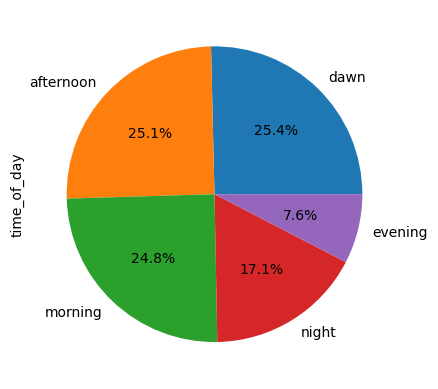

In [22]:
fraud = data[data.is_fraud ==1]
real = data[data.is_fraud ==0]
print(fraud.time_of_day.value_counts())
fraud.time_of_day.value_counts().plot(kind='pie',autopct='%.001f%%')


    The highest number of fraud incidents took place during the early morning, morning, and afternoon hours, specifically between 00:00 AM and 18:00 PM.

    The lowest number of fraud incidents occurred between 18:00 PM and 20:00 PM.

##  Dispersion of fraud occurrences throughout different days of the week across various time intervals.

time_of_day  Is Weekend
afternoon    False         132
             True           53
dawn         False         135
             True           52
evening      False          37
             True           19
morning      False         118
             True           65
night        False          88
             True           38
dtype: int64


<Axes: xlabel='time_of_day,Is Weekend'>

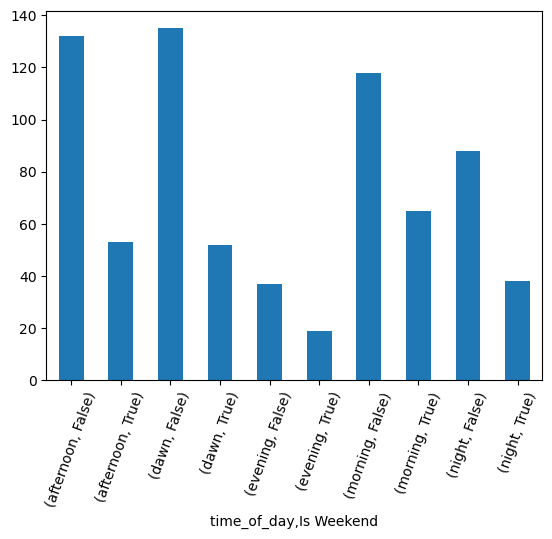

In [23]:
print(fraud[['time_of_day','Is Weekend']].groupby(['time_of_day','Is Weekend']).value_counts())
fraud[['time_of_day','Is Weekend']].groupby(['time_of_day','Is Weekend']).value_counts().plot(kind='bar',rot=70)

    The peak occurrences of fraud are observed at dawn on weekdays and during the afternoon on weekends.

    The least instances of fraud take place in the evening, both on weekdays and weekends.

    On average, there is a 14.54% increase in the number of fraud incidents during various time periods on weekends compared to weekdays.

## Comparing Credit Limits and Frequency.

<Axes: ylabel='Frequency'>

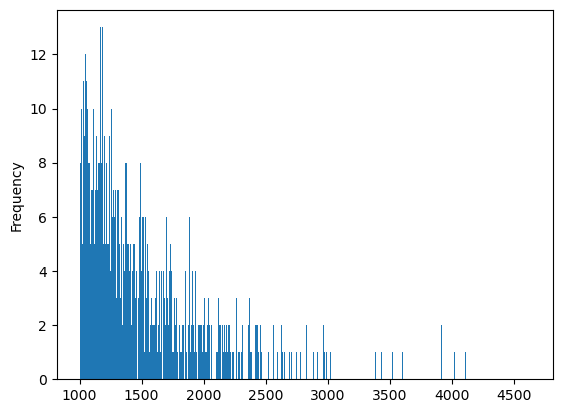

In [24]:
fraud.credit_limit.plot(kind='hist',bins=500)

    The highest frequency of credit limits for defrauded cards falls within the range of $1000 to $1250.​

    Cards with credit limits of $3000 and above appear to be less targeted.​

    ​

## correlation heatmap 

C:\Users\raksh\AppData\Local\Temp\ipykernel_492\3067742791.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(fraud.corr(),ax=ax,annot=True)


<Axes: >

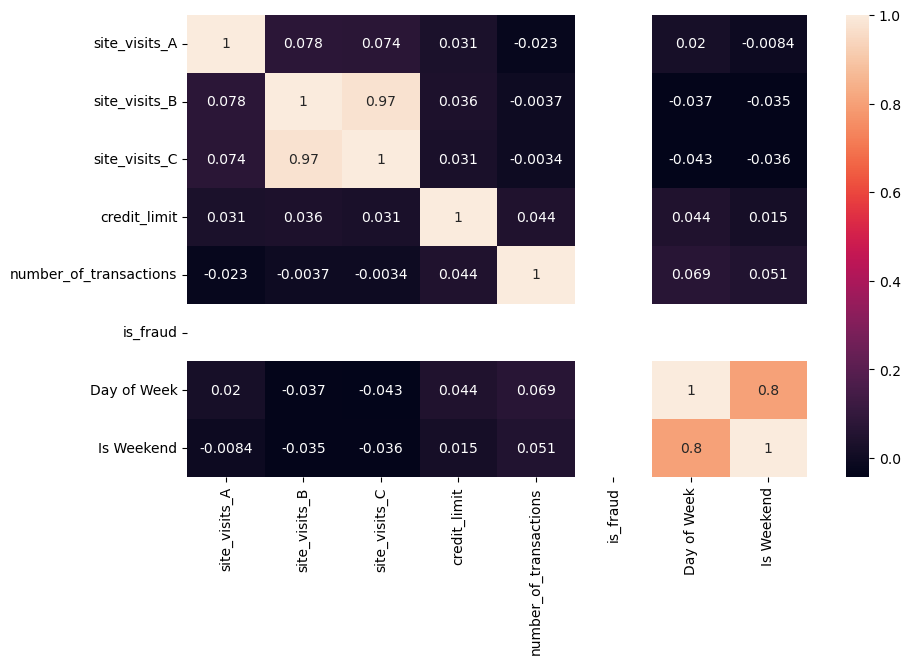

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(fraud.corr(),ax=ax,annot=True)



## Extracting domain from email ids

In [26]:
test=data['email'].str.extract(r'(@[\w.]+)')
test.replace('@','',inplace=True)
data['domain']=test[0].str[1:]
data.domain.head()

id
0      yolasite.com
1    soundcloud.com
2        discuz.net
3     tuttocitta.it
4         alexa.com
Name: domain, dtype: object

## Dispersion of Domains Associated with Frauds.​

facebook.com         71
yolasite.com         70
amazon.co.jp         61
themeforest.net      49
desdev.cn            48
alexa.com            48
umich.edu            40
typepad.com          40
discuz.net           38
slashdot.org         35
nih.gov              30
sbwire.com           23
tiny.cc              21
chron.com            20
soundcloud.com       16
topsy.com            15
tuttocitta.it        13
psu.edu              12
unblog.fr            12
squidoo.com          11
ezinearticles.com    10
alibaba.com           9
ovh.net               8
ocn.ne.jp             6
cbsnews.com           5
spiegel.de            4
mozilla.org           3
stumbleupon.com       3
unc.edu               2
photobucket.com       2
netvibes.com          2
twitpic.com           1
live.com              1
is.gd                 1
cdbaby.com            1
g.co                  1
wikimedia.org         1
oakley.com            1
macromedia.com        1
craigslist.org        1
jalbum.net            1
Name: domain, dt

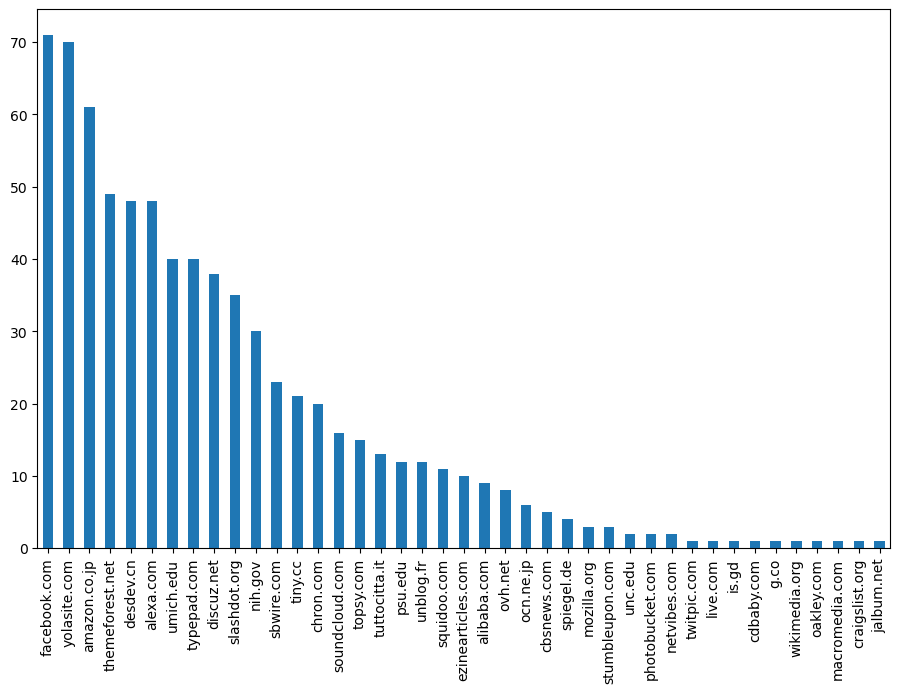

In [27]:
fraud = data[data.is_fraud ==1]
fraud.domain.value_counts().plot(kind='bar',figsize=(11,7))
fraud.domain.value_counts()

    The domains with the highest occurrences of fraud are facebook.com and yolasite.com.​

    Conversely, the domains with the least instances of fraud are macromedia.com, craigslist.org, and jalbum.net.​

    ​

In [28]:
data.dist_latest_transaction_address_km.replace('unknown',np.nan,inplace=True)
data.dist_latest_transaction_address_km= data.dist_latest_transaction_address_km.astype('float')

## Contrast in fraud distribution between weekends and weekdays.​

False    510
True     227
Name: Is Weekend, dtype: int64

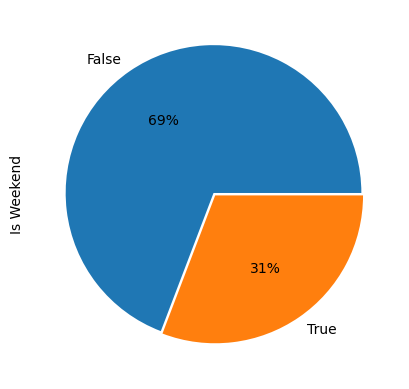

In [29]:
fraud['Is Weekend'].value_counts().plot(kind='pie',autopct='%1.0f%%',explode=(0.01,0.01))
fraud['Is Weekend'].value_counts()

    The average weekday fraud rate stands at 13.8%​

    Weekends show an average of 15.5% in fraud occurrences. ​

    This suggests a notably higher likelihood of fraud taking place on weekends, with a difference of approximately 12.38%​

## Distribution of frauds over the 3 months​



02    361
03    309
01     67
Name: month, dtype: int64

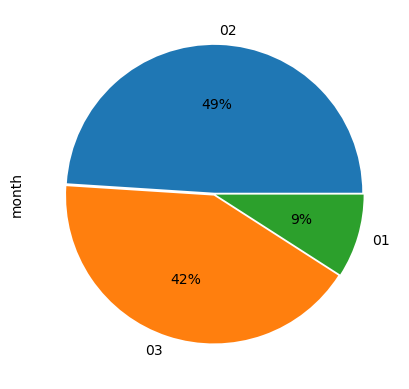

In [30]:
fraud.month.value_counts().plot(kind='pie',autopct='%1.0f%%',explode=(0.01,0.01,0.01))
fraud.month.value_counts()

    The highest number of fraud incidents occurred in February, followed by March, and then January.​

    There was a remarkable 444.444% surge in fraud cases from January to February.​

    However, there was a subsequent decrease of 14.2857% in fraud incidents from February to March.​

    ​

## Distribution of frauds per day of the week over 3 months​

month  Day of Week
01     0               7
       1               8
       2              11
       3              10
       4               5
       5              15
       6              11
02     0              42
       1              58
       2              56
       3              49
       4              48
       5              56
       6              52
03     0              46
       1              43
       2              35
       3              50
       4              42
       5              48
       6              45
dtype: int64
95
12.890094979647218
109
14.789687924016281
102
13.83989145183175
109
14.789687924016281
95
12.890094979647218
119
16.14654002713704
108
14.654002713704205


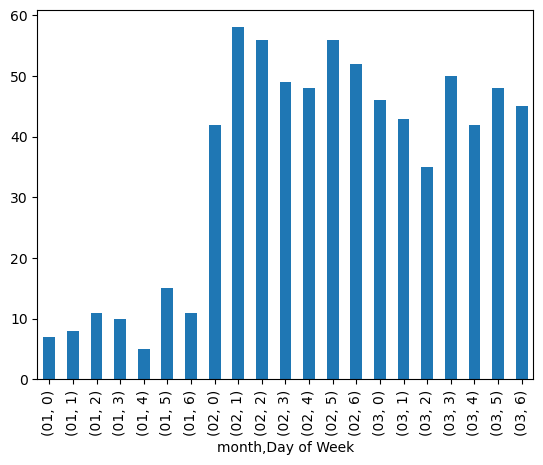

In [31]:
fraud[['month','Day of Week']].groupby(['month','Day of Week']).value_counts().plot(kind='bar')
print(fraud[['month','Day of Week']].groupby(['month','Day of Week']).value_counts())
for i in range(0,7):
    print(fraud.is_fraud[fraud['Day of Week']==i].count())
    print((fraud.is_fraud[fraud['Day of Week']==i].count())/737*100)

    The highest number of frauds occurs on a Saturday ​

    The lowest number of frauds occurs on  a Monday and Friday​

    There is an increase in fraud by about  7.3% from the start of the week to the middle​

    And further increase in fraud by 16.7% from the mid of the week towards the start of the weekend​

## Distribution of frauds per day before or after 11:00 

Day of Week  eleven
0            after     51
             before    44
1            after     56
             before    53
2            after     51
             before    51
3            after     57
             before    52
4            after     56
             before    39
5            after     61
             before    58
6            after     67
             before    41
dtype: int64
eleven    399
dtype: int64 eleven    338
dtype: int64


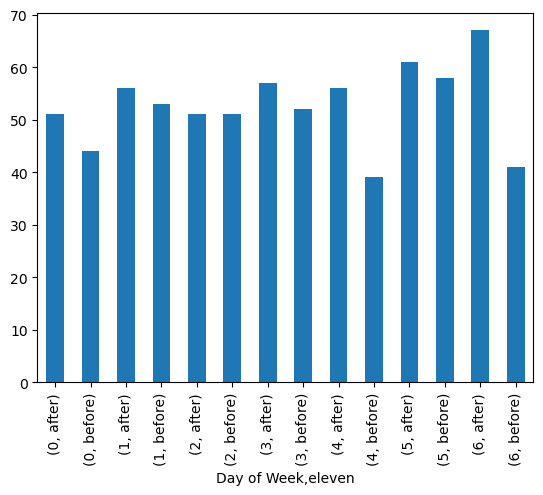

In [32]:

fraud[['Day of Week','eleven']].groupby(['Day of Week','eleven']).value_counts().plot(kind='bar')
print(fraud[['Day of Week','eleven']].groupby(['Day of Week','eleven']).value_counts())
#0 - monday
fraud[['eleven']][(fraud['Day of Week']==0)&(fraud.eleven=='after')].count()
a , b = 0 , 0
for i in range(0,7):

    a = a + fraud[['eleven']][(fraud['Day of Week']==i)&(fraud.eleven=='after')].count()
    b = b + fraud[['eleven']][(fraud['Day of Week']==i)&(fraud.eleven=='before')].count()
print(a,b)

## Dispersion of domain extensions​

C:\Users\raksh\AppData\Local\Temp\ipykernel_492\397695339.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['web'] = data['web'].str.replace('.','')


com    350
net     96
jp      67
edu     54
cn      48
org     40
gov     30
cc      21
it      13
fr      12
de       4
co       1
gd       1
Name: web, dtype: int64

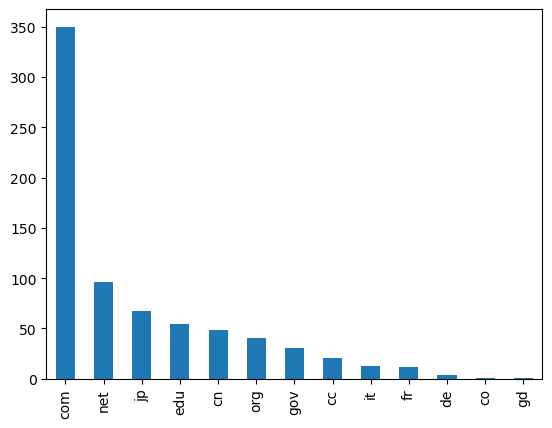

In [33]:
data['web'] = data.domain.str[-3:]
data['web'] = data['web'].str.replace('.','')
fraud = data[data.is_fraud==1]
fraud.web.value_counts().plot(kind='bar')
fraud.web.value_counts()

    The largest proportion of fraud incidents is associated with the .com extension, comprising nearly 47%.​

    Extensions like .net and .jp contribute to 13% and 9% of the fraud cases, respectively.​

    The least frequency of frauds is observed with extensions such as .co (Colombia) and .gd (Grenada).​
    
    The inclusion of gov and edu could indicate false fraud flagging as the domain extensions are relatively hard to aquire 
    ​

## Arrangement of Transaction Counts in 5-Interval Bins.​

​

In [34]:
copy_data1 = fraud
trans_bins = pd.IntervalIndex.from_tuples([(0, 5), (5, 10), (10, 15),(15,20),(20,25),(25,30),(30,35),(35,40)])
copy_data1['trans Range'] = pd.cut(copy_data1['number_of_transactions'], bins=trans_bins)


C:\Users\raksh\AppData\Local\Temp\ipykernel_492\1932125963.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_data1['trans Range'] = pd.cut(copy_data1['number_of_transactions'], bins=trans_bins)


(15, 20]    307
(20, 25]    263
(25, 30]     87
(10, 15]     65
(5, 10]       8
(30, 35]      6
(35, 40]      1
(0, 5]        0
Name: trans Range, dtype: int64

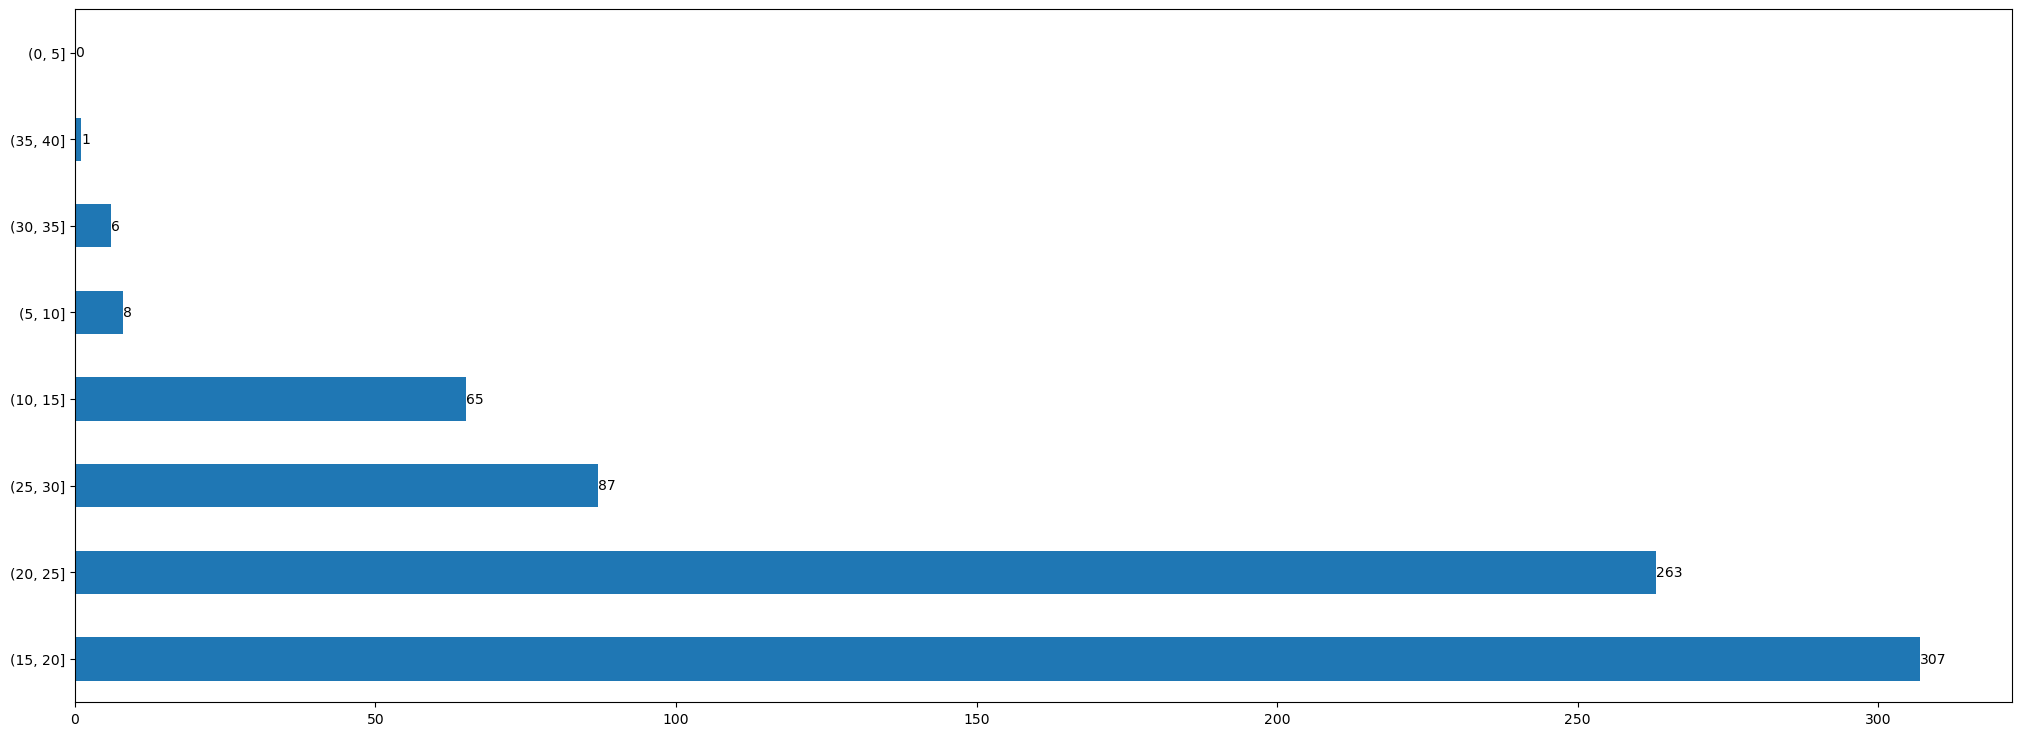

In [35]:
ax = copy_data1['trans Range'].value_counts().plot(kind='barh',figsize=(25,9))
ax.bar_label(ax.containers[0]);
copy_data1['trans Range'].value_counts()

    The interval with the highest number of transactions is 15 - 20, constituting nearly 41% of the total.​

    The transaction ranges 35 - 40 and 0 - 5 have the lowest occurrences of fraud, with no recorded instances in the latter.​

    The range 15 - 25 appears to have the highest susceptibility to fraudulent activities.​

    ​

## Dispersion of Distances for the Most Recent Transactions in 5 KM Intervals.​

C:\Users\raksh\AppData\Local\Temp\ipykernel_492\2749356546.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_data1['dist Range'] = pd.cut(data['dist_latest_transaction_address_km'], bins=dist_bins)


(0, 5]      360
(5, 10]     125
(10, 15]    106
(15, 20]     38
(20, 25]     20
(25, 30]      8
(30, 35]      3
(35, 40]      1
(40, 45]      1
Name: dist Range, dtype: int64

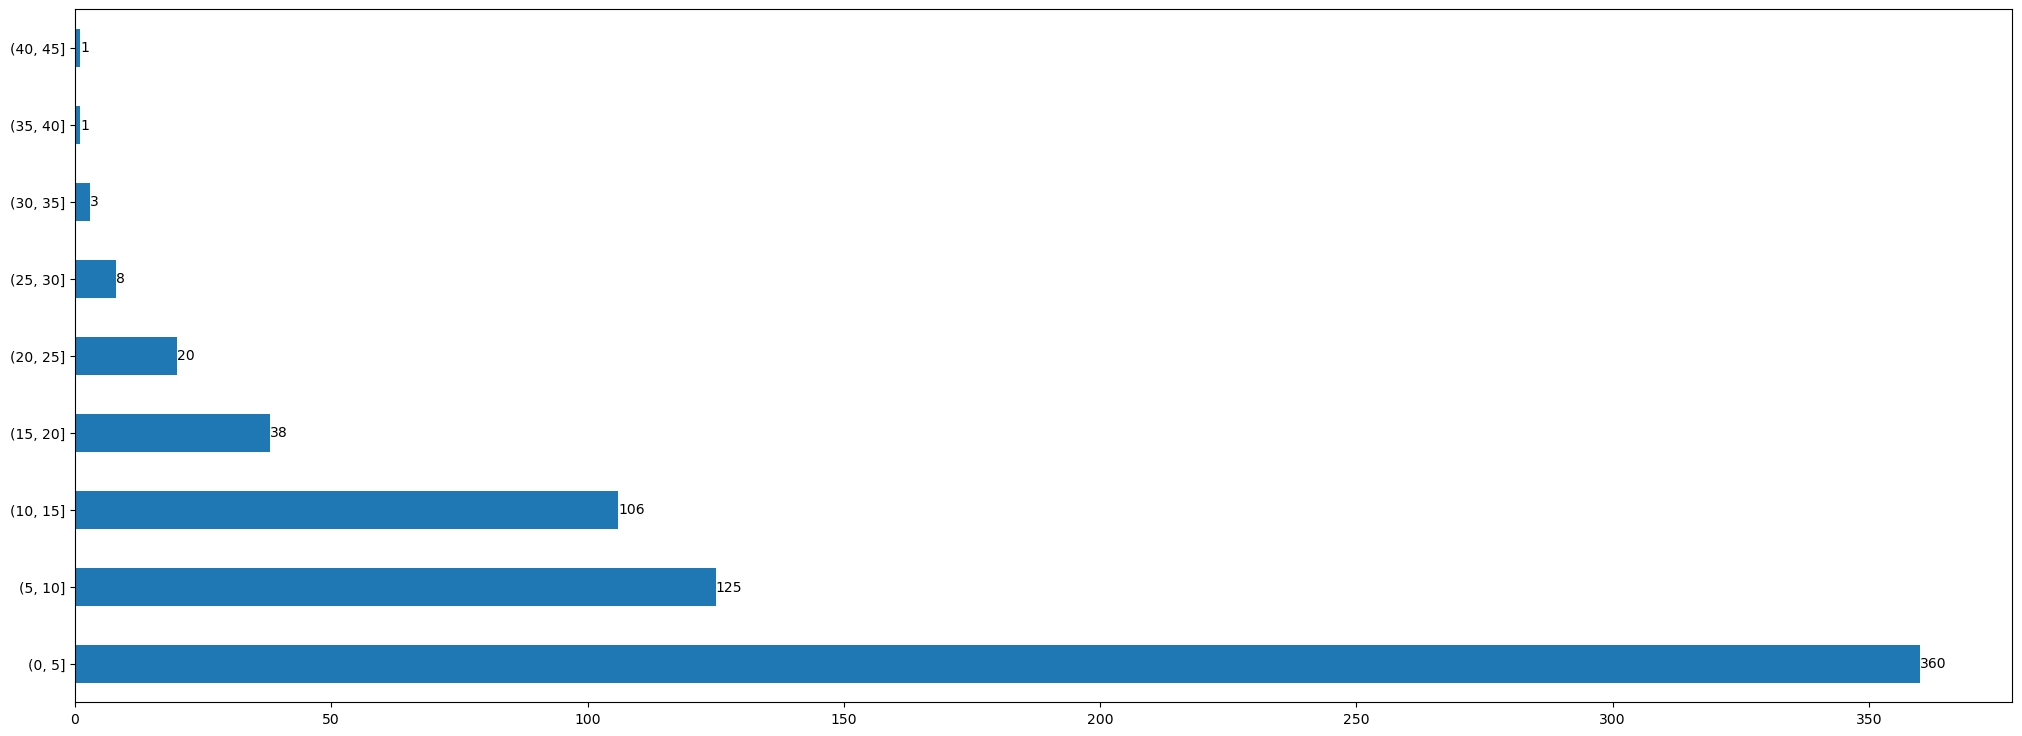

In [36]:
dist_bins = pd.IntervalIndex.from_tuples([(0, 5), (5, 10), (10, 15),(15,20),(20,25),(25,30),(30,35),(35,40),(40,45)])
copy_data1['dist Range'] = pd.cut(data['dist_latest_transaction_address_km'], bins=dist_bins)
ax = copy_data1['dist Range'].value_counts().plot(kind='barh',figsize=(25,9))

ax.bar_label(ax.containers[0]);
copy_data1['dist Range'].value_counts()



    The interval with the highest frequency of fraud incidents is 0-5 KM, encompassing nearly 49% of all fraud cases.​

    This indicates that individuals engaging in card theft are more likely to utilize the stolen cards for fraudulent activities in closer proximity to the card owners.​

    The range with the least number of frauds is 35-45 KMs, comprising only 2 reported fraud incidents.​

    ​

## Depiction of the Visitor Count for Each Website Alongside the Quantity Affected by Fraudulent Activity.​

​

In [37]:
site_A = data[data.site_visits_A != 0 ]
site_B = data[data.site_visits_B != 0 ]
site_C = data[data.site_visits_C != 0 ]
print(site_A.is_fraud.value_counts(),site_B.is_fraud.value_counts(),site_C.is_fraud.value_counts())

0.0    18201
1.0      700
Name: is_fraud, dtype: int64 0.0    11723
1.0      435
Name: is_fraud, dtype: int64 0.0    11726
1.0      436
Name: is_fraud, dtype: int64


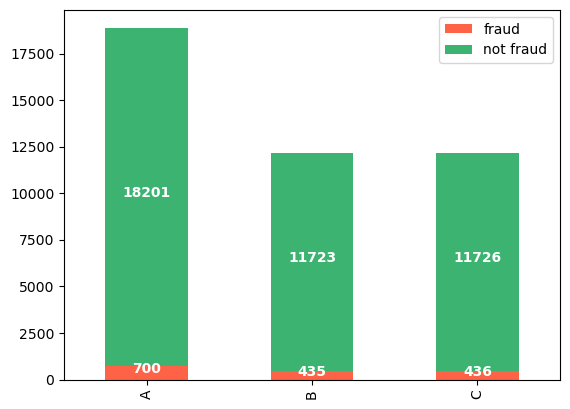

In [38]:
alll = pd.DataFrame({
            'fraud':[700,435,436],
            'not fraud':[18201,11723,11726]},
            index = ['A','B','C'],
            )
ax = alll.plot(kind='bar',stacked=True,color=['tomato', 'mediumseagreen'])
#ax = ax.bar_label(ax.containers[1]);
for bar in ax.patches:
    
    ax.text(bar.get_x() + bar.get_width() /2 ,
    bar.get_height() / 2 + bar.get_y(),
    round(bar.get_height()), ha = 'center',
      color = 'w', weight = 'bold', size = 10)

    The ratio of visitors who encountered no fraud to those who experienced fraud stands at 26:1 for site A, 27:1 for site B, and 26:1 for site C.​

    Site A displays the highest proportion of visitors falling victim to fraud at 3.70%, followed by site C at 3.58%, and site B at 3.57%.​

    ​

## Count of visitors who exclusively accessed individual sites and encountered fraudulent activities​

In [39]:
print(fraud.is_fraud[(fraud.site_visits_A != 0 ) & (fraud.site_visits_B == 0 ) & (fraud.site_visits_C == 0 )].count())
print(fraud.is_fraud[(fraud.site_visits_A == 0 ) & (fraud.site_visits_B != 0 ) & (fraud.site_visits_C == 0 )].count())
print(fraud.is_fraud[(fraud.site_visits_A == 0 ) & (fraud.site_visits_B == 0 ) & (fraud.site_visits_C != 0 )].count())

286
0
0


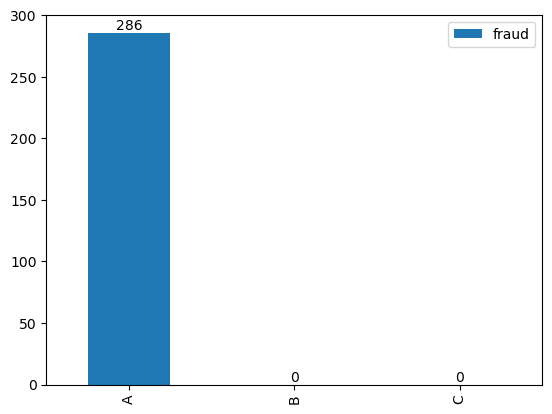

In [40]:
q = pd.DataFrame({
            'fraud':[286,0,0]},
            index = ['A','B','C'],
            )
ax = q.plot(kind='bar')
ax = ax.bar_label(ax.containers[0]);


    Site A boasts the highest count of users exclusively accessing it, totaling 286 individuals.​

    Conversely, both Site B and Site C show zero users who accessed only their respective sites.​

    This suggests an elevated likelihood for users who accessed Site A to encounter fraudulent activities.​

    ​